In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
import symreg
from gpbenchmarks import get_data

from experiment_settings import nguyen7_funset, pagie_funset, keijzer_funset, korns12_funset, vlad_funset


In [2]:
import pygmo as pg

In [3]:
vectors = []
n_actives = []

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):
        #vectors.append(x)
        
        individual = tengp.individual.NPIndividual(list(x), self.bounds, self.params)
        pred = individual.transform(self.X)
        
        #n_actives.append(len(individual.active_nodes))
        
        try:
            return [mean_squared_error(pred, self.Y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        return self.bounds

In [4]:
kw_params = {'real_valued': True, 'max_back': 20}

params_nguyen7 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_pagie1  = tengp.Parameters(2, 1, 1, 50, pagie_funset, **kw_params)
params_keijzer6 = tengp.Parameters(2, 1, 1, 50, keijzer_funset, **kw_params)
params_korns = tengp.Parameters(6, 1, 1, 50, korns12_funset, **kw_params)
params_vlad = tengp.Parameters(6, 1, 1, 50, vlad_funset, **kw_params)

all_params = [params_nguyen7, params_pagie1, params_keijzer6, params_korns, params_vlad]

In [5]:
import random 

data = [
    ('nguyen7', symreg.get_benchmark_nguyen7(random, None), params_nguyen7),
    ('pagie1', symreg.get_benchmark_pagie1(random, None), params_pagie1),
    ('keijzer6', symreg.get_benchmark_keijzer(random, 6), params_keijzer6),
    ('korns12', symreg.get_benchmark_korns(random, 12), params_korns),
    ('vladislasleva4', symreg.get_benchmark_vladislasleva4(random, None), params_vlad)
]

In [ ]:
%%time
results = []
champions = []


for name, (x_train, y_train, x_test, y_test), params in data[0:1]:
    print(name)
    bounds = tengp.individual.IndividualBuilder(params).create().bounds[:]
    
    prob = pg.problem(cost_function(np.c_[x_train, np.ones(len(x_train))], y_train, params, bounds))
    
    problem_results = []
    pg.set_global_rng_seed(42)
    for i in range(100):
        print(i, end=',')
        algo = pg.algorithm(pg.pso(gen=2000))
        algo.set_verbosity(1)
        pop = pg.population(prob, 50)
        pop = algo.evolve(pop)
        problem_results.append(pop.champion_f[0])
        #champions.append(pop.champion_x)
    results.append(problem_results)

nguyen7
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,

In [32]:
def plot_results(name, outs):
    print(name)
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    plt.figure()
    plt.title(name)
    sns.distplot(costs, kde=False);
    

nguyen7
min: 3.687058440425671e-07
mean: 0.0003688849233447746
median: 0.00022024742476646454
variance: 2.348194722262772e-07
pagie1
min: 0.036153357729544866
mean: 0.17441345194404145
median: 0.1295189001069494
variance: 0.08134362984535157
keijzer6
min: 8.758404617778535e-06
mean: 0.0019940797964859997
median: 0.0007865876958723029
variance: 1.192920826135666e-05
korns12
min: 1.1366637483723863
mean: 1.1965712302623628
median: 1.137756531592336
variance: 0.05148164292699149
vladislasleva4
min: 0.02259591609651704
mean: 0.030103856746275904
median: 0.03043241516372662
variance: 7.059585163627808e-06


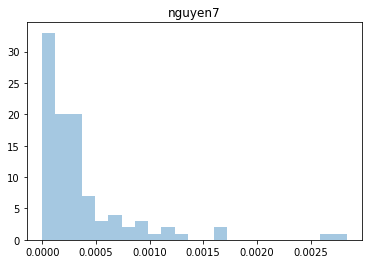

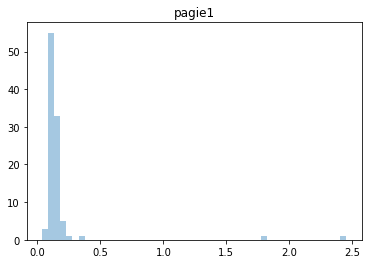

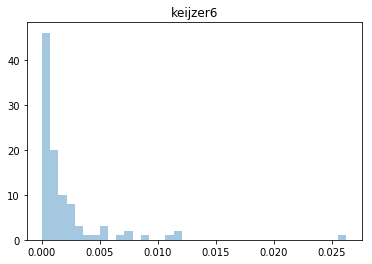

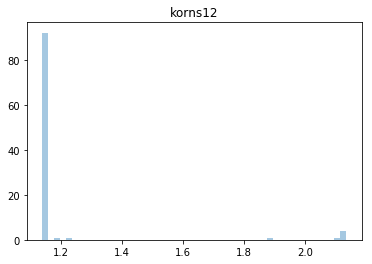

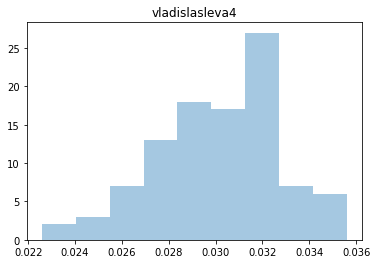

In [33]:
for d, result in zip(data, results):
    plot_results(d[0], result)

# Rounding of results

In [56]:
rounded_results = []

chunk = 100
for i, (name, (x_train, y_train, x_test, y_test), params) in zip(range(5), data):
    problem_results = []
    
    x_train = np.c_[x_train, np.ones(len(x_train))]
        
    bounds = tengp.individual.IndividualBuilder(params).create().bounds
    
    print(name)
    
    for genes in champions[chunk*i:chunk*i + chunk]:
        
        individual = params.individual_class(np.round(genes), bounds, params)
        
        output = individual.transform(x_train)
        
        try:
            problem_results.append(mean_squared_error(output, y_train))
        except ValueError:
            print('value error')
    
    rounded_results.append(problem_results)
        
        

nguyen7
value error
pagie1
value error
value error
value error
value error
value error
value error
value error
value error
value error
value error
value error
value error
value error
value error
keijzer6
value error

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/exp


value error
value error
value error
value error
value error
value error
value error
value error
value error
value error
value error
korns12


/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:26: RuntimeWarning: overflow encountered in power
  return x**3


value error
vladislasleva4
value error
value error
value error
value error
value error
value error
value error
value error


In [63]:
np.min(rounded_results[4])

0.042740078693692674